## Lending Club Case Study

In [157]:
#Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
## Load the csv file into a dataframe
loan_cust=pd.read_csv('loan.csv')
loan_cust.head(5)
type(loan_cust)


C:\Users\palla\AppData\Local\Temp\ipykernel_61952\324706129.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_cust=pd.read_csv('C:/Users/palla/OneDrive/Desktop/Project/Upgrad/CaseStudy/loan/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [159]:
## check the information  of the dataframe
loan_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [160]:
## size of the data set rows and column we have 111 column
loan_cust.shape

(39717, 111)

In [161]:
## CHeck all available columns
loan_cust.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## Data-cleaning
1. identify columns with Null values
2. drop column which has high null values 

In [162]:
# check the count of null values
loan_cust.isnull().sum()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [163]:
(100*loan_cust.isnull().sum())/len(loan_cust.index)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

#### drop columns which has all null values -  100%


In [254]:
loan_cust.dropna(axis=1,how='all',inplace=True)

# check the columns 
loan_cust.shape


pandas.core.frame.DataFrame

In [165]:
# check the % null values in remaining columns
((loan_cust.isnull().sum())/len(loan_cust.index)*100)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [166]:
# drop the columns which has more than 90% 
loan_cust.drop(labels=['mths_since_last_record','next_pymnt_d'],axis=1,inplace=True)

In [167]:
(loan_cust.isnull().sum())/len(loan_cust.index)*100


id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [168]:
#Column with more than 60% cannot remove those rows so we better aproach is to drop the column
loan_cust.drop(labels=['mths_since_last_delinq'],axis=1,inplace=True)

In [169]:
loan_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [170]:
#check values in the dataframe
loan_cust.head(10)
loan_cust.tail(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39707,92666,92661,5000,5000,525.0,36 months,9.33%,159.77,B,B3,...,161.55,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39708,92552,92542,5000,5000,375.0,36 months,9.96%,161.25,B,B5,...,162.07,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39709,92533,92529,5000,5000,675.0,36 months,11.22%,164.23,C,C4,...,165.17,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39710,92507,92502,5000,5000,250.0,36 months,7.43%,155.38,A,A2,...,156.29,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39711,92402,92390,5000,5000,700.0,36 months,8.70%,158.30,B,B1,...,159.83,Nov-14,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,256.59,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [171]:
# Identified Nan, zero values in last 5 columns. checking further on these colunms
loan_cust['tax_liens'].value_counts()



0.0    39678
Name: tax_liens, dtype: int64

In [172]:
loan_cust['delinq_amnt'].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [173]:
loan_cust['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [174]:
loan_cust['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [175]:
loan_cust['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [176]:
loan_cust['acc_now_delinq'].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [177]:
## removing columns based on above result (Nan or zero)

loan_cust.drop(labels=['acc_now_delinq','collections_12_mths_ex_med','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1,inplace=True)

loan_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [178]:
loan_cust.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0.0


In [179]:
## Check Empty rows and cplumsn 

print('Empty Rows in dataset: ',loan_cust.isnull().all(axis=1).sum())
print('EMpty columsn in dataset: ',loan_cust.isnull().all(axis=0).sum())

Empty Rows in dataset:  0
EMpty columsn in dataset:  0


In [180]:
loan_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [208]:
#Rmove those colums which are not required like desc, member_id, zip_code, emp_title and other 


loan_cust.drop(labels=['member_id','zip_code','emp_title','desc','url',"application_type","policy_code","initial_list_status","installment","pymnt_plan"],axis=1,inplace=True)


In [199]:
# Remove string "months" - from term column 
loan_cust['term'] = loan_cust[['term']].applymap(lambda x:str(x).rstrip('months'))
loan_cust['term'] = loan_cust['term'].astype('int64')
loan_cust.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,year,month,loan_amnt_cats
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0,2011,12,0-7000
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,...,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0,2011,12,0-7000
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0.0,2011,12,0-7000
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0,2011,12,7000-14000
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1,...,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0.0,2011,12,0-7000


In [183]:
## COlumn int_rate and  - remove % symbol from the values 
loan_cust['int_rate'] = loan_cust['int_rate'].str.rstrip('%')
loan_cust['revol_util'] = loan_cust['revol_util'].str.rstrip('%')

In [184]:
## Treat the emp_length column to have only integers
# remove additional characters like +,<, years
loan_cust['emp_length'].value_counts()
loan_cust['emp_length']=loan_cust.emp_length.str.extract('(\d+)')
loan_cust['emp_length'].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [185]:
loan_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

## Derive new columns  from exisitng data

In [187]:
# Derived columns

loan_cust.issue_d = pd.to_datetime(loan_cust.issue_d, format='%b-%y')
loan_cust['year'] = loan_cust['issue_d'].dt.year
loan_cust['month'] = loan_cust['issue_d'].dt.month

In [201]:
loan_cust.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,year,month,loan_amnt_cats
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0,2011,12,0-7000
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,...,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0,2011,12,0-7000
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0.0,2011,12,0-7000
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0,2011,12,7000-14000
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1,...,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0.0,2011,12,0-7000


## Important column analysis

### loan_amnt - Univariate Analysis


In [194]:
 loan_cust.loan_amnt.describe()


count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

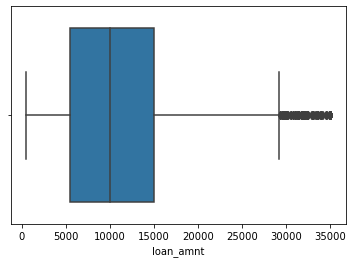

In [195]:
#check outliers
sns.boxplot(loan_cust.loan_amnt)

In [221]:
## Int_rate - Univariate Analysis
loan_cust.int_rate.unique()
## COnvert the object type to float for int_rate
loan_cust['int_rate']=loan_cust['int_rate'].astype(float)
loan_cust.int_rate.unique()


array([10.65, 15.27, 15.96, 13.49, 12.69,  7.9 , 18.64, 21.28, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 22.06, 20.3 , 19.42,
       20.89, 19.03, 23.52, 23.13, 22.74, 23.91, 22.35, 24.11,  6.  ,
       11.99,  5.99, 10.99, 18.79, 11.49,  8.49, 15.99, 16.49,  6.99,
       12.99, 15.23, 14.79,  5.42, 17.49, 10.59, 15.62, 21.36,  7.49,
        9.99, 19.29, 13.99, 18.39, 20.62, 16.89, 17.99, 20.25, 20.99,
       22.85, 21.74, 23.22, 22.48, 19.69, 22.11, 23.59, 18.07, 11.63,
        7.91,  7.42, 11.14, 20.2 , 12.12, 16.11, 17.54, 22.64, 13.84,
       19.39, 12.62, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 18.49,
       22.94, 19.79, 24.4 , 21.48, 14.82, 14.17,  7.29, 17.51, 16.02,
       13.43, 14.91, 13.06, 15.28, 17.14, 11.11, 10.37, 16.4 , 15.65,
        7.66, 10.  , 18.62, 10.74, 17.88,  5.79,  6.92,  9.63, 14.54,
       12.68, 19.36, 13.8 , 18.99, 20.11, 21.59, 20.85, 19.74, 20.48,
       21.22,  6.91,

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

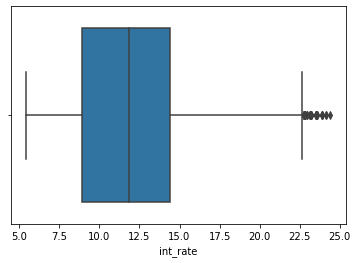

In [225]:
## boxplot for outlier
loan_cust.int_rate.describe()
#check outliers
sns.boxplot(loan_cust.int_rate)


In [ ]:
### annual_inc - Univariate Analysis

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

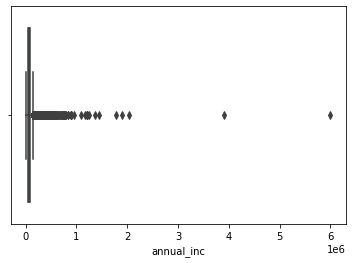

In [206]:
loan_cust.annual_inc.describe()

#convert to integer
loan_cust['annual_inc'] = loan_cust['annual_inc'].astype('int64')
loan_cust['annual_inc'].head(50)
#check outliers
sns.boxplot(loan_cust.annual_inc)


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


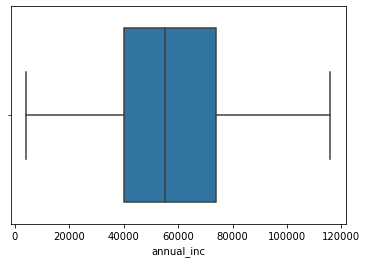

In [207]:
#remove outliers, more than 90% 
loan_cust = loan_cust[loan_cust["annual_inc"] < loan_cust["annual_inc"].quantile(0.90)]
sns.boxplot(loan_cust.annual_inc)
plt.show()

In [ ]:
## total_pymnt

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


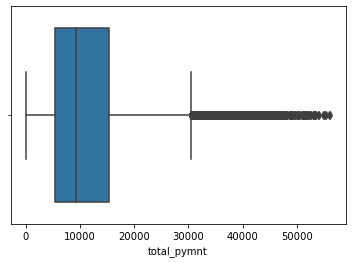

In [226]:
sns.boxplot(loan_cust.total_pymnt)
plt.show()

In [ ]:
## Loan Status

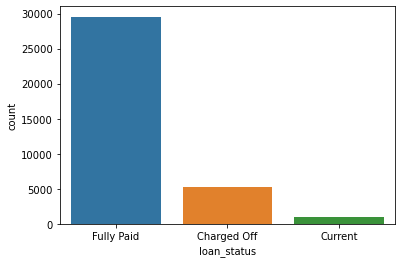

In [227]:
sns.countplot(x="loan_status",data = loan_cust)
plt.show()

In [255]:
##print("%.2f" % (loan_cust.loc[loan_cust['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan_cust)))
(loan_cust.loan_status.value_counts()*100)/len(loan_cust)

Fully Paid     82.669278
Charged Off    14.549524
Current         2.781198
Name: loan_status, dtype: float64

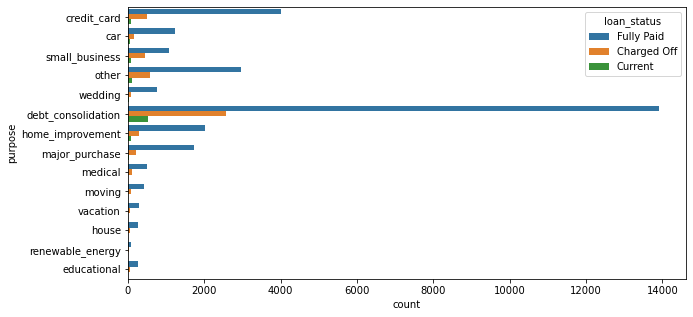

In [230]:
## Bivariate Analysis , Loan_status and purpose

plt.figure(figsize=(10,5))
sns.countplot(y="purpose",data=loan_cust,hue='loan_status')
plt.show()

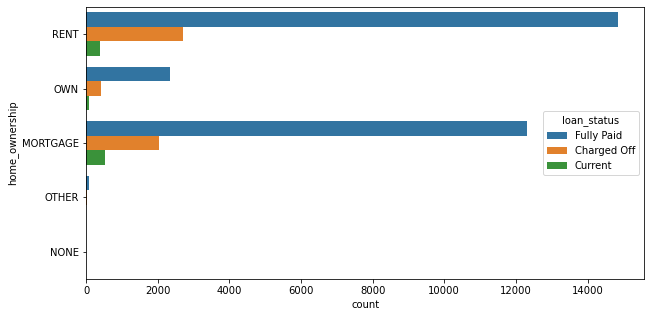

In [231]:
#Home ownership and loan status

plt.figure(figsize=(10,5))
sns.countplot(y="home_ownership",data=loan_cust,hue='loan_status')
plt.show()



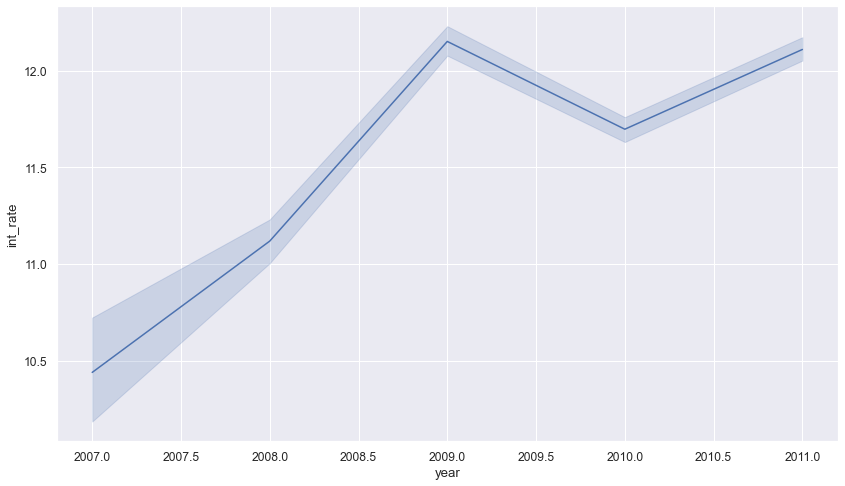

In [251]:
# Year and int_rate

plt.figure(figsize=(14,8))
axis = sns.lineplot(y='int_rate', x='year', data = loan_cust)
plt.show()

In [ ]:
#Correlation matrix

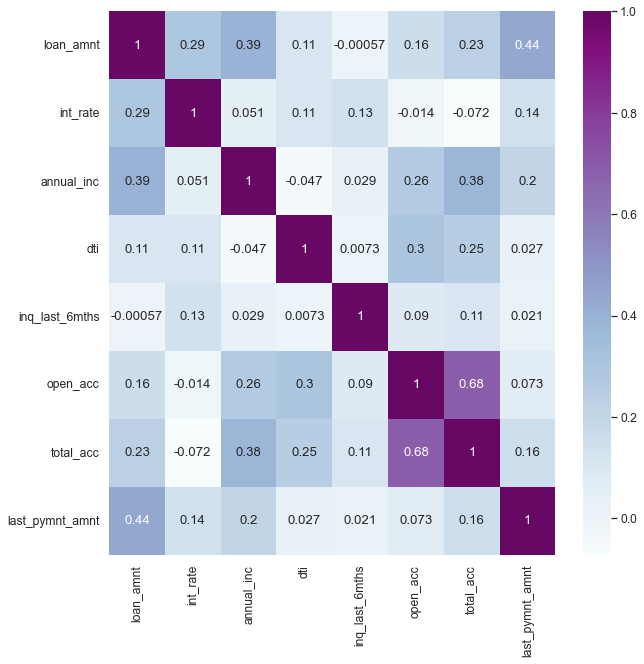

In [247]:
#correlation matrix for 
plt.figure(figsize=(10,10))
corr_var= ['loan_amnt', 'int_rate','emp_length', 'annual_inc','dti','inq_last_6mths', 'open_acc', 'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']
corr = loan_cust[corr_var].corr()
sns.heatmap(corr, annot=True, center=0.5 ,cmap="BuPu")
plt.show()
